In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop,Adam

In [ ]:
#from google.colab import files
#uploaded=files.upload()

Saving Company stock prices.xlsx to Company stock prices (2).xlsx


In [ ]:
data=pd.read_excel("Company stock prices.xlsx")

In [ ]:
#data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


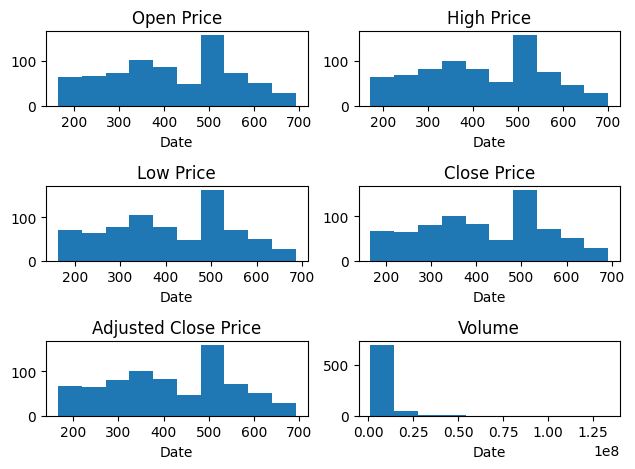

In [ ]:
# Open
plt.subplot(3, 2, 1)
plt.hist(data['Open'])
plt.title('Open Price')
plt.xlabel('Date')

# High
plt.subplot(3, 2, 2)
plt.hist(data['High'])
plt.title('High Price')
plt.xlabel('Date')

# Low
plt.subplot(3, 2, 3)
plt.hist(data['Low'])
plt.title('Low Price')
plt.xlabel('Date')

# Close
plt.subplot(3, 2, 4)
plt.hist(data['Close'])
plt.title('Close Price')
plt.xlabel('Date')

# Adj Close
plt.subplot(3, 2, 5)
plt.hist(data['Adj Close'])
plt.title('Adjusted Close Price')
plt.xlabel('Date')

# Volume
plt.subplot(3, 2, 6)
plt.hist(data['Volume'])
plt.title('Volume')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
df=data[['Date','Close']]

In [ ]:
#df

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    753 non-null    datetime64[ns]
 1   Close   753 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


In [ ]:
df.describe()

,Close
count,753.000000
mean,414.796653
std,134.669664
min,166.369995
25%,313.480011
50%,416.029999
75%,519.780029
max,691.690002


<Axes: >

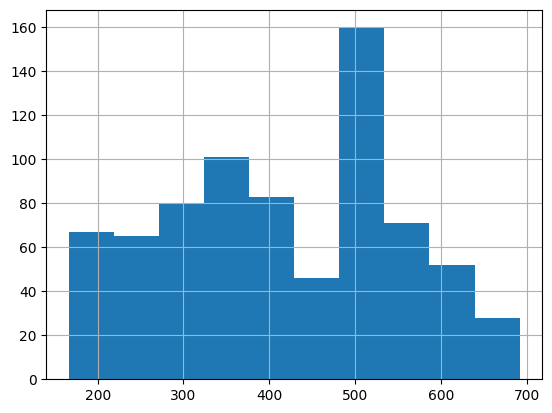

In [ ]:
df['Close'].hist()

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
#df

,Close
Date,
2020-10-19,530.719971
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999
...,...
2023-10-10,373.320007
2023-10-11,365.929993
2023-10-12,361.200012


<Axes: xlabel='Date'>

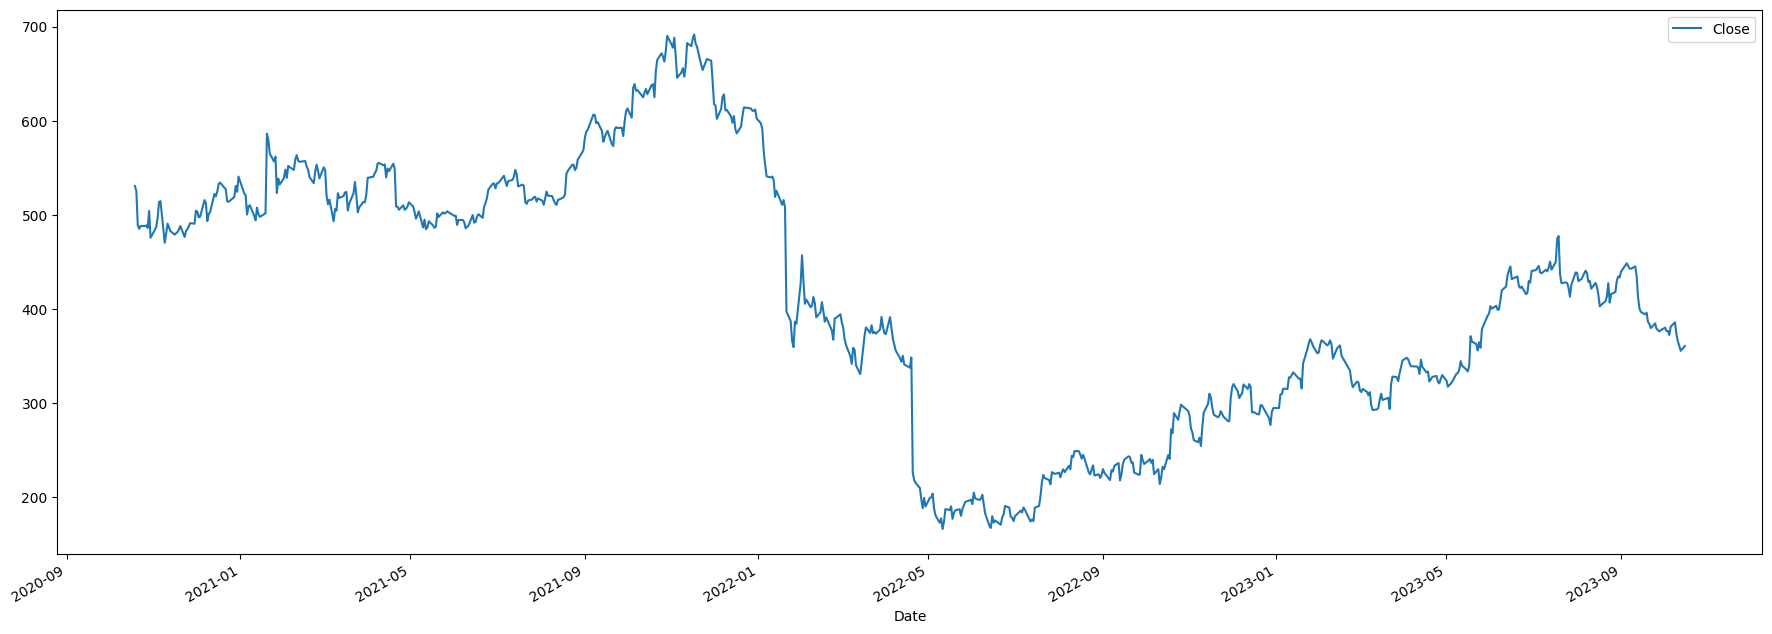

In [ ]:
df.plot(figsize=(22,8))

In [ ]:
result=seasonal_decompose(df['Close'],model='multiplicative',period=22)

<Axes: xlabel='Date'>

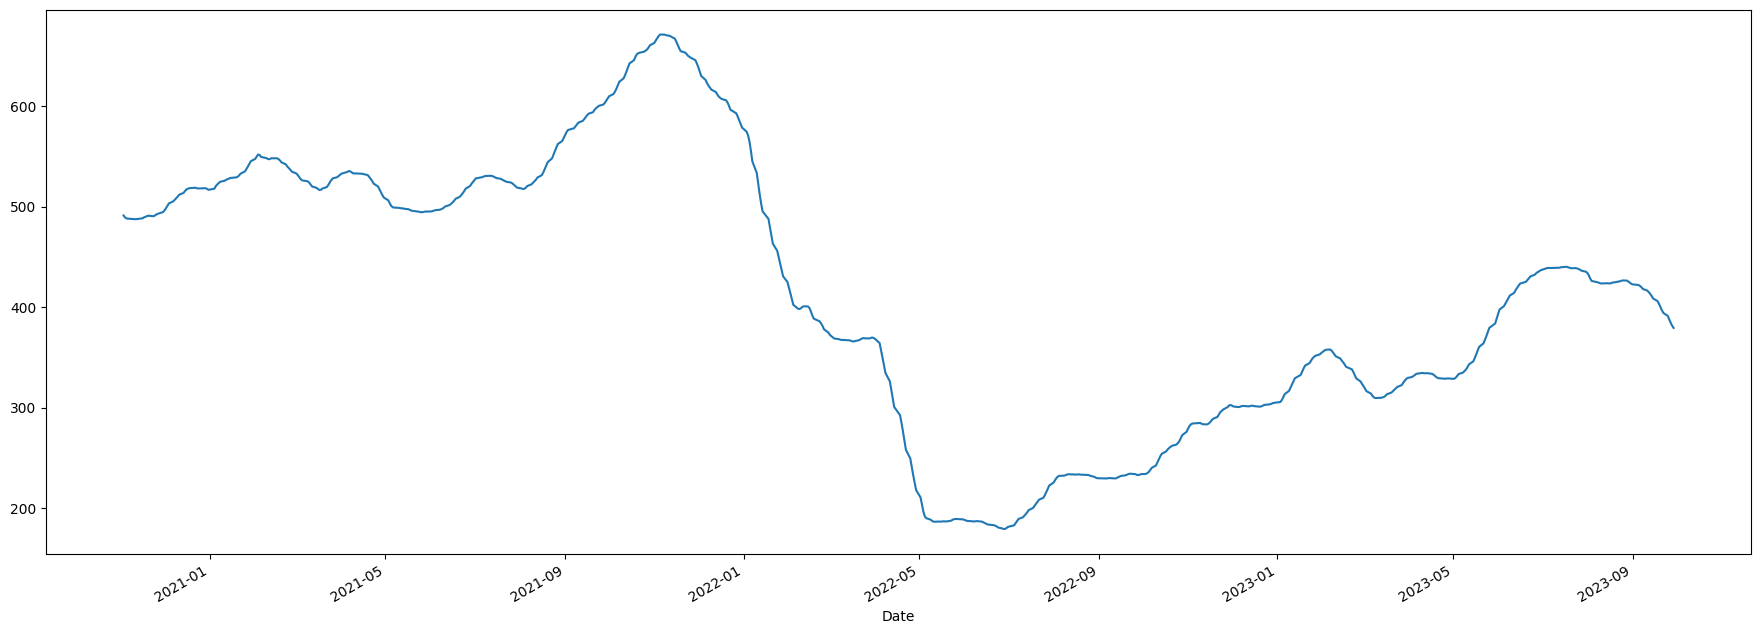

In [ ]:
result.trend.plot(figsize=(22,8))

<Axes: xlabel='Date'>

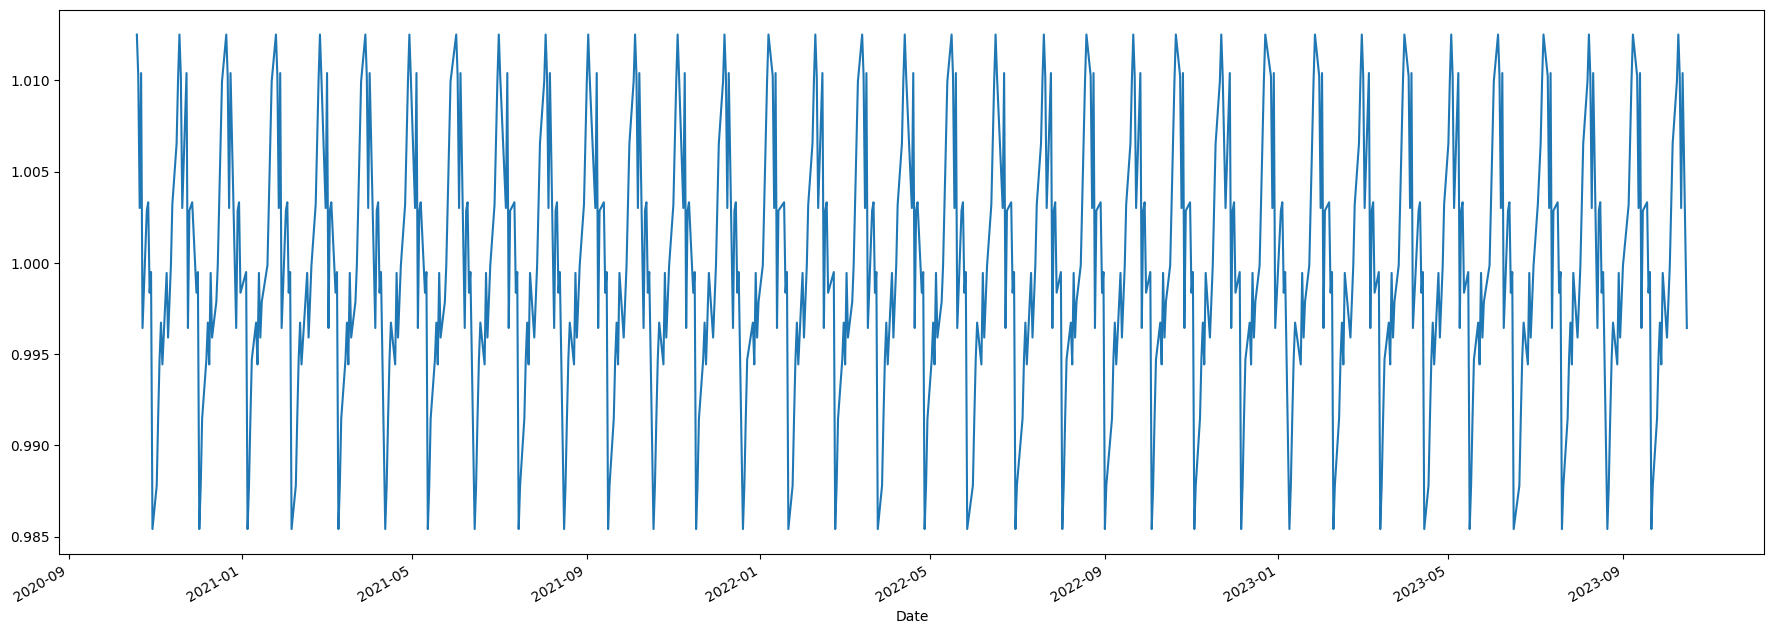

In [ ]:
result.seasonal.plot(figsize=(22,8))

<Axes: xlabel='Date'>

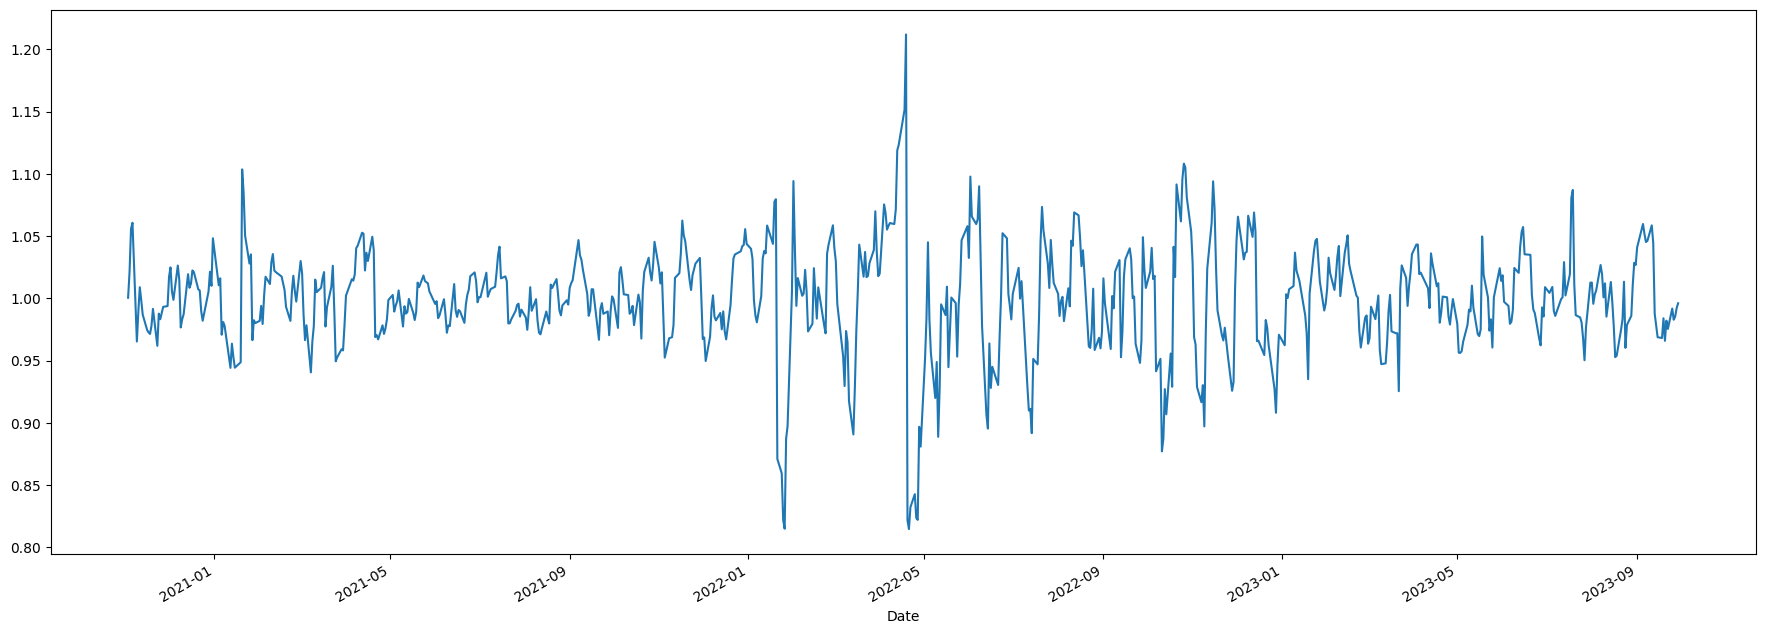

In [ ]:
result.resid.plot(figsize=(22,8))

In [ ]:
df=data[['Close']]
#df

,Close
0,530.719971
1,525.419983
2,489.049988
3,485.230011
4,488.279999
...,...
748,373.320007
749,365.929993
750,361.200012
751,355.679993


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data = df.values

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
sequence_length = 10

In [ ]:
sequences, labels = [], []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    labels.append(data[i+sequence_length])

In [ ]:
sequences = np.array(sequences)
labels = np.array(labels)

In [ ]:
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))

In [ ]:
X_train, X_test = sequences[:split_index], sequences[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
19/19 [==============================] - 3s 7ms/step - loss: 0.1148
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 10/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 11/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 12/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 13/50
19/19 [==============================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

5/5 [==============================] - 0s 4ms/step - loss: 8.0343e-04
Test loss: 0.0008034285856410861


In [ ]:
model.save("lstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predictions = model.predict(data)

24/24 [==============================] - 1s 2ms/step


In [ ]:
df.reset_index(inplace=True)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import streamlit as st
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import datetime
import numpy as np
import pandas as pd

st.title('Close Price Forecasting :')
loaded_model = load_model('my_lstm_model.h5')
def predict_close_price_for_future_dates(future_dates, loaded_model, df):
    predictions = []

    for date in future_dates:
        # Initialize a sequence of data points for prediction with historical data
        historical_data_sequence = list(df)
        scaler = MinMaxScaler()

        # Make the prediction for the specified date
        scaled_data = scaler.fit_transform(np.array(historical_data_sequence).reshape(-1,1))
        prediction = loaded_model.predict(scaled_data)
        prediction = scaler.inverse_transform(prediction)

        predictions.append((date, prediction[0][0]))

    return predictions

def main():
    st.markdown('This is a simple web app for close price forecasting :chart:')

    # Load historical data or provide a way to load it
    historical_data = df

    # Input field for selecting future dates
    st.write("Enter future dates for close price forecasting:")
    selected_dates = st.date_input("Future Date", [datetime.date(2023, 12, 1)])

    if st.button('Forecast Close Prices'):
        future_predictions = predict_close_price_for_future_dates(selected_dates, loaded_model, historical_data['Close'])
        for date, prediction in future_predictions:
            st.success(f'Close price prediction for {date}: {prediction:.2f}')

if __name__ == '__main__':
    main()